In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv' ,encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3041,ham,Slaaaaave ! Where are you ? Must I summon you ...,NaN,NaN,NaN
4564,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
3926,ham,Lol ... I really need to remember to eat when ...,NaN,NaN,NaN
328,ham,"Cool, text me when you're parked",NaN,NaN,NaN
513,ham,No..jst change tat only..,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## Pre - Processing : 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
1781,ham,";-( oh well, c u later"
1728,ham,As per your request 'Maangalyam (Alaipayuthe)'...
2209,ham,"Hmm well, night night"
3002,ham,I will see in half an hour
3344,ham,Reverse is cheating. That is not mathematics.


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2305,ham,Still in the area of the restaurant. Ill try t...
2493,ham,they released another Italian one today and it...
5437,ham,Am slow in using biola's fne
694,ham,Ah poop. Looks like ill prob have to send in m...
1059,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
1410,0,Pls speak to that customer machan.
2926,0,Ok... U enjoy ur shows...
1950,0,Oh ic. I thought you meant mary jane.
2344,0,Okie...
5534,0,Ok which your another number


In [11]:
# Check for Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()  # Remove Duplicates

403

In [13]:
# Drop Duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

## EDA :

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

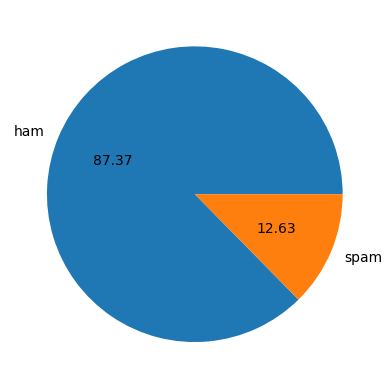

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Text Analysis :

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)  # No. of Characters in each message
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # No. of Words in each message
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  # No. of Sentences in each message
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Anlayzing for Ham meassges(0)

df[ df['target']== 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# Anlayzing for Spam meassges(0)

df[ df['target']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


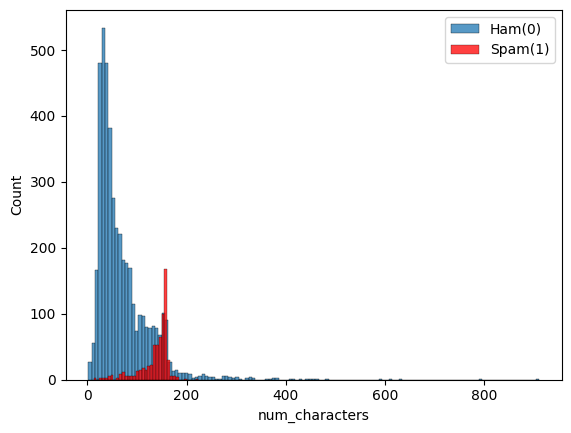

In [28]:
sns.histplot(df[df['target'] == 0]['num_characters'],label='Ham(0)')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red',label='Spam(1)')
plt.legend()

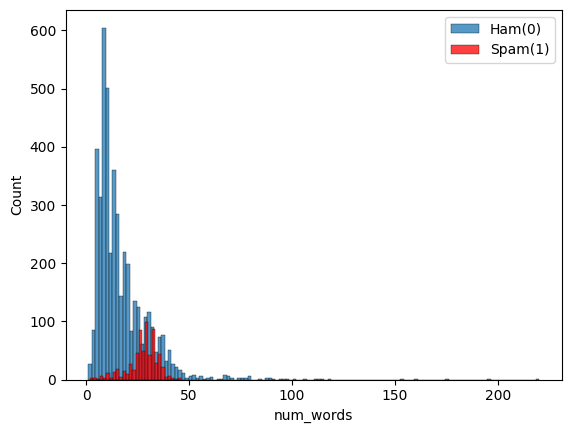

In [29]:
sns.histplot(df[df['target'] == 0]['num_words'],label='Ham(0)')
sns.histplot(df[df['target'] == 1]['num_words'],color='red',label='Spam(1)')
plt.legend()

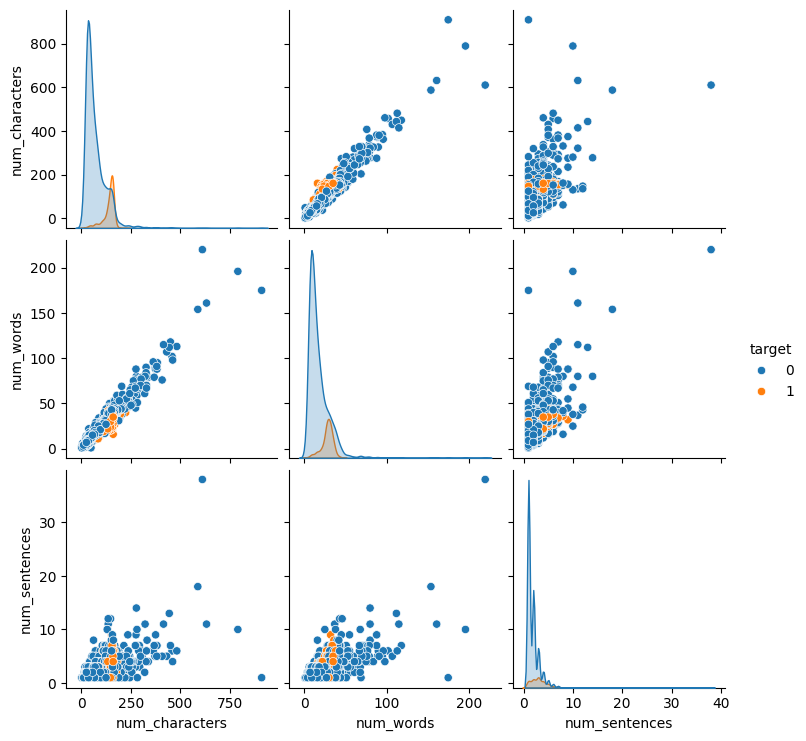

In [30]:
sns.pairplot(df,hue='target')

## Text Preprocessing :

In [31]:
import string
from nltk.corpus import stopwords
# stopwords.words('english')  # Stopwords
# string.punctuation

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) # Tokenization

    y = []
    for i  in text:
        if i.isalnum():
            y.append(i)  # Removing special characters

    text = y[:]
    y.clear()

    # Removing stopwords & punctuation
    for i in text:
        if (i not in stopwords.words('english')) and (i not in string.punctuation):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
df.sample(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
496,0,Nope... Think i will go for it on monday... So...,67,16,3,nope think go monday sorri repli late
733,0,Even u dont get in trouble while convincing..j...,137,30,1,even u dont get troubl convinc tel twice tel n...
271,0,"Night has ended for another day, morning has c...",147,32,2,night end anoth day morn come special way may ...


In [36]:
from wordcloud import WordCloud

In [37]:
wc = WordCloud(width=700,height=600,min_font_size=8,background_color='white')

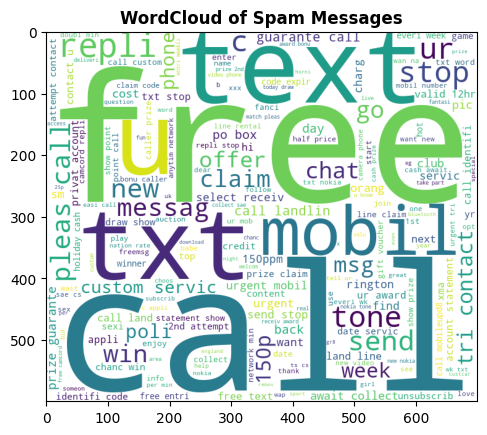

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.title("WordCloud of Spam Messages",fontweight='bold')
plt.imshow(spam_wc)

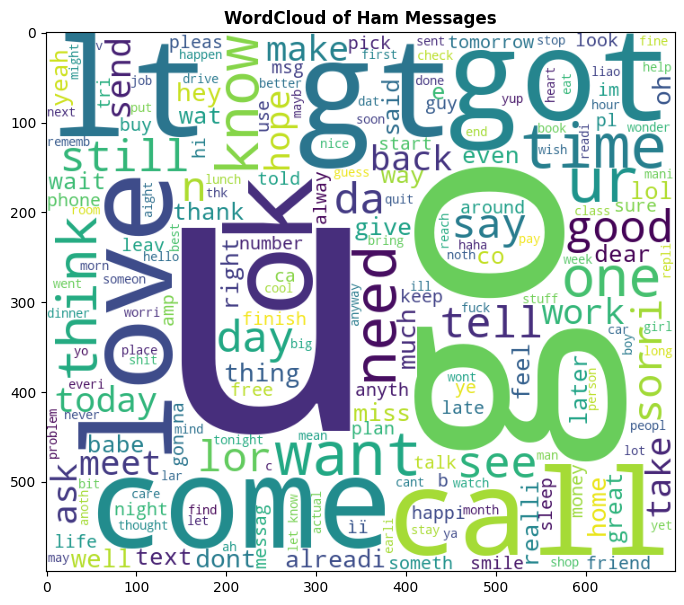

In [39]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(11,7))
plt.title("WordCloud of Ham Messages",fontweight='bold')
plt.imshow(ham_wc)

In [40]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
import warnings
warnings.filterwarnings('ignore')

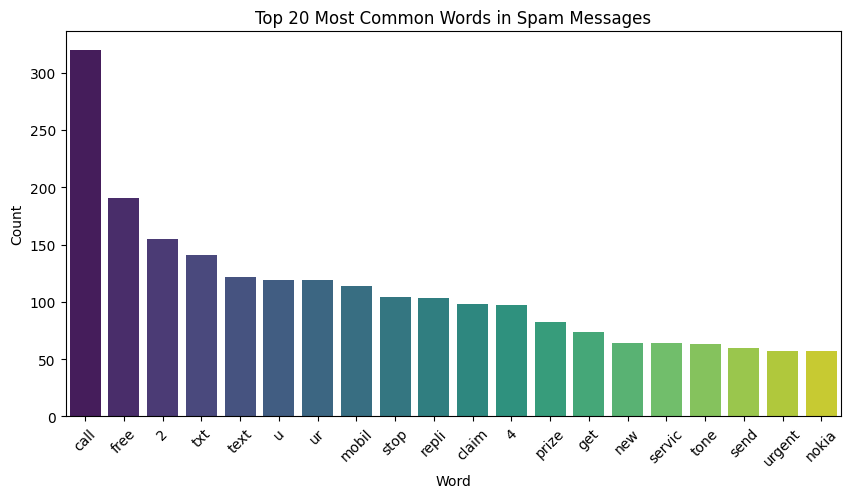

In [42]:
from collections import Counter

most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='Count', data=most_common_df, palette='viridis')
plt.title("Top 20 Most Common Words in Spam Messages")
plt.xticks(rotation=45)
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

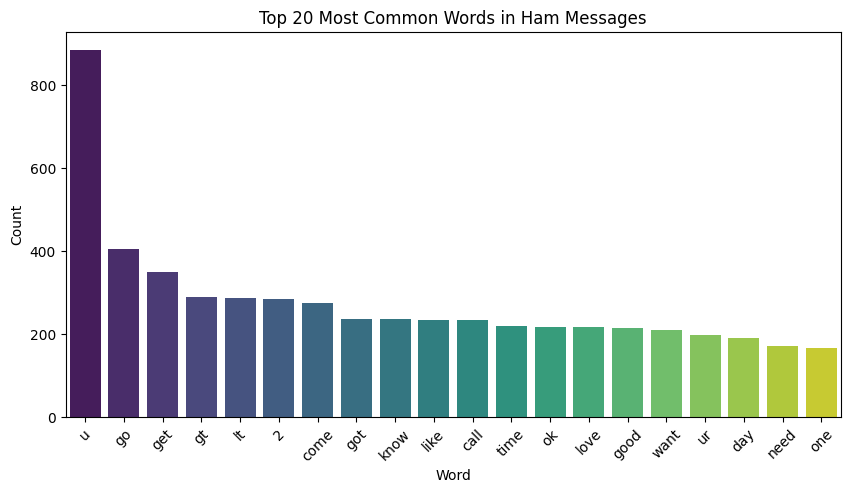

In [44]:
most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='Count', data=most_common_df, palette='viridis')
plt.title("Top 20 Most Common Words in Ham Messages")
plt.xticks(rotation=45)
plt.show()

## Model Building :

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

In [46]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()   # Vectorization

In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['target'].values
y.shape

(5169,)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred1))
print('\n',classification_report(y_test,y_pred1))

Accuracy :  0.8694390715667312

               precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred2))
print('\n',classification_report(y_test,y_pred2))

Accuracy :  0.9709864603481625

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred3))
print('\n',classification_report(y_test,y_pred3))

Accuracy :  0.9835589941972921

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [56]:
import pickle

In [57]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))